## Libraries and data source

In [17]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
data_breaches = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/washington_state_data_breaches/Data/Data_Breach_Notifications_Affecting_Washington_Residents_20240523.csv')

In [3]:
data_breaches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DateAware                          1086 non-null   object 
 1   DateSubmitted                      1109 non-null   object 
 2   DataBreachCause                    1109 non-null   object 
 3   DateStart                          970 non-null    object 
 4   DateEnd                            903 non-null    object 
 5   Name                               1109 non-null   object 
 6   Id                                 1109 non-null   int64  
 7   CyberattackType                    805 non-null    object 
 8   WashingtoniansAffected             1077 non-null   float64
 9   IndustryType                       1109 non-null   object 
 10  BusinessType                       514 non-null    object 
 11  Year                               1109 non-null   int64

In [4]:
data_breaches.head(5)

,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,...,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange,EntityState
0,02/04/2021 12:00:00 AM,03/17/2021 12:00:00 AM,Cyberattack,02/04/2021 12:00:00 AM,02/08/2021 12:00:00 AM,Automatic Funds Transfer Services Inc.,10427,Ransomware,695.0,Finance,...,4.0,0.0,4.0,True,4.0,NaN,False,41.0,1-99,NaN
1,12/20/2019 12:00:00 AM,03/17/2021 12:00:00 AM,Cyberattack,NaN,NaN,PCS Revenue Control Systems,10428,Phishing,11807.0,Business,...,NaN,NaN,NaN,False,NaN,NaN,False,453.0,Unknown,NaN
2,02/22/2021 12:00:00 AM,03/17/2021 12:00:00 AM,Cyberattack,12/24/2020 12:00:00 AM,12/29/2020 12:00:00 AM,Western Union Retail Money Transfer Partner,10429,Malware,1555.0,Finance,...,0.0,60.0,60.0,False,5.0,55.0,False,23.0,1-99,NaN
3,05/24/2020 12:00:00 AM,03/18/2021 12:00:00 AM,Cyberattack,05/24/2020 12:00:00 AM,NaN,Manson Counstruction Co.,10430,Unclear/unknown,1049.0,Business,...,NaN,0.0,NaN,False,NaN,NaN,False,298.0,Unknown,NaN
4,01/18/2021 12:00:00 AM,03/19/2021 12:00:00 AM,Cyberattack,01/12/2021 12:00:00 AM,01/18/2021 12:00:00 AM,Cancer Treatment Centers of America,10431,Phishing,579.0,Health,...,0.0,6.0,6.0,True,6.0,NaN,True,60.0,1-99,NaN


In [5]:
data_breaches.columns

Index(['DateAware', 'DateSubmitted', 'DataBreachCause', 'DateStart', 'DateEnd',
       'Name', 'Id', 'CyberattackType', 'WashingtoniansAffected',
       'IndustryType', 'BusinessType', 'Year', 'YearText',
       'WashingtoniansAffectedRange', 'BreachLifecycleRange',
       'DaysToContainBreach', 'DaysToIdentifyBreach', 'DaysBreachLifecycle',
       'DiscoveredInProgress', 'DaysOfExposure',
       'DaysElapsedBetweenEndAndDiscovery', 'EndedOnDayDiscovered',
       'DaysElapsedBeforeNotification', 'DaysOfExposureRange', 'EntityState'],
      dtype='object')

In [6]:
# create simplified dataframe for easier analysis
db_simple = data_breaches.drop(columns=['DateSubmitted', 'DateStart', 'DateEnd', 'YearText', 'DiscoveredInProgress', 'DaysElapsedBetweenEndAndDiscovery', 'EndedOnDayDiscovered', 'EntityState', 'DaysOfExposureRange'])

In [7]:
db_simple

,DateAware,DataBreachCause,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,BusinessType,Year,WashingtoniansAffectedRange,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DaysOfExposure,DaysElapsedBeforeNotification
0,02/04/2021 12:00:00 AM,Cyberattack,Automatic Funds Transfer Services Inc.,10427,Ransomware,695.0,Finance,NaN,2021,500-999,1-99,4.0,0.0,4.0,4.0,41.0
1,12/20/2019 12:00:00 AM,Cyberattack,PCS Revenue Control Systems,10428,Phishing,11807.0,Business,Professional Services,2021,"10,000-49,999",Unknown,NaN,NaN,NaN,NaN,453.0
2,02/22/2021 12:00:00 AM,Cyberattack,Western Union Retail Money Transfer Partner,10429,Malware,1555.0,Finance,NaN,2021,"1,000-9,999",1-99,0.0,60.0,60.0,5.0,23.0
3,05/24/2020 12:00:00 AM,Cyberattack,Manson Counstruction Co.,10430,Unclear/unknown,1049.0,Business,Construction,2021,"1,000-9,999",Unknown,NaN,0.0,NaN,NaN,298.0
4,01/18/2021 12:00:00 AM,Cyberattack,Cancer Treatment Centers of America,10431,Phishing,579.0,Health,NaN,2021,500-999,1-99,0.0,6.0,6.0,6.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,05/30/2023 12:00:00 AM,Cyberattack,Greylock McKinnon & Associates,16715,Unclear/unknown,1323.0,Business,Legal,2024,"1,000-9,999",Unknown,NaN,NaN,NaN,NaN,322.0
1105,02/28/2024 12:00:00 AM,Cyberattack,On Q Financial,16716,Other,18757.0,Finance,NaN,2024,"10,000-49,999",1-99,0.0,7.0,7.0,1.0,34.0
1106,04/07/2023 12:00:00 AM,Cyberattack,Centennial Bank,16717,Ransomware,3044.0,Finance,NaN,2024,"1,000-9,999",1-99,0.0,1.0,1.0,1.0,378.0
1107,09/05/2023 12:00:00 AM,Cyberattack,"Pacific Guardian Life Insurance Company, Limited",16718,Phishing,1950.0,Business,Other,2024,"1,000-9,999",1-99,0.0,11.0,11.0,0.0,212.0


## Exploratory Inspection

In [8]:
industry_breaches = db_simple[['Name', 'CyberattackType', 'Year', 'DataBreachCause', 'IndustryType', 'BusinessType', 'WashingtoniansAffectedRange']]
industry_breaches

,Name,CyberattackType,Year,DataBreachCause,IndustryType,BusinessType,WashingtoniansAffectedRange
0,Automatic Funds Transfer Services Inc.,Ransomware,2021,Cyberattack,Finance,NaN,500-999
1,PCS Revenue Control Systems,Phishing,2021,Cyberattack,Business,Professional Services,"10,000-49,999"
2,Western Union Retail Money Transfer Partner,Malware,2021,Cyberattack,Finance,NaN,"1,000-9,999"
3,Manson Counstruction Co.,Unclear/unknown,2021,Cyberattack,Business,Construction,"1,000-9,999"
4,Cancer Treatment Centers of America,Phishing,2021,Cyberattack,Health,NaN,500-999
...,...,...,...,...,...,...,...
1104,Greylock McKinnon & Associates,Unclear/unknown,2024,Cyberattack,Business,Legal,"1,000-9,999"
1105,On Q Financial,Other,2024,Cyberattack,Finance,NaN,"10,000-49,999"
1106,Centennial Bank,Ransomware,2024,Cyberattack,Finance,NaN,"1,000-9,999"
1107,"Pacific Guardian Life Insurance Company, Limited",Phishing,2024,Cyberattack,Business,Other,"1,000-9,999"


### Attacks

In [14]:
attack_types = industry_breaches['CyberattackType'].value_counts()
attack_types

Ransomware         348
Malware            192
Other               99
Phishing            76
Unclear/unknown     76
Skimmers            14
Name: CyberattackType, dtype: int64

In [28]:
labels = 'Ransomware', 'Malware', 'Other', 'Phishing', 'Unclear/unknown', 'Skimmers'
sizes = [348, 192, 99, 76, 76, 14]

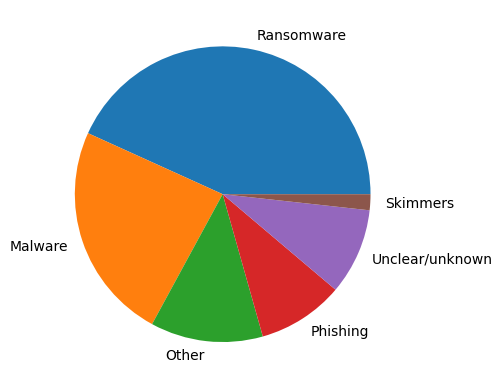

In [33]:
fig, ax = plt.subplots()
ax.pie(attack_types, labels = labels);

In [38]:
industry_attacks = industry_breaches[['CyberattackType', 'IndustryType']]
industry_attacks

,CyberattackType,IndustryType
0,Ransomware,Finance
1,Phishing,Business
2,Malware,Finance
3,Unclear/unknown,Business
4,Phishing,Health
...,...,...
1104,Unclear/unknown,Business
1105,Other,Finance
1106,Ransomware,Finance
1107,Phishing,Business


In [45]:
industry_attack_counts = industry_attacks.value_counts()
industry_attack_counts

CyberattackType  IndustryType      
Malware          Business              148
Ransomware       Business              112
                 Non-Profit/Charity     71
                 Health                 59
                 Education              53
Unclear/unknown  Business               43
Ransomware       Finance                43
Other            Business               41
                 Finance                27
Phishing         Business               26
                 Health                 22
Other            Health                 20
Malware          Health                 18
                 Finance                17
Unclear/unknown  Health                 13
Phishing         Finance                13
Ransomware       Government             10
Skimmers         Business               10
Unclear/unknown  Finance                 8
Phishing         Government              6
Unclear/unknown  Non-Profit/Charity      5
Malware          Non-Profit/Charity      5
Phishing         N

### Breach causes

In [73]:
industry_breaches

,Name,CyberattackType,Year,DataBreachCause,IndustryType,BusinessType,WashingtoniansAffectedRange
0,Automatic Funds Transfer Services Inc.,Ransomware,2021,Cyberattack,Finance,NaN,500-999
1,PCS Revenue Control Systems,Phishing,2021,Cyberattack,Business,Professional Services,"10,000-49,999"
2,Western Union Retail Money Transfer Partner,Malware,2021,Cyberattack,Finance,NaN,"1,000-9,999"
3,Manson Counstruction Co.,Unclear/unknown,2021,Cyberattack,Business,Construction,"1,000-9,999"
4,Cancer Treatment Centers of America,Phishing,2021,Cyberattack,Health,NaN,500-999
...,...,...,...,...,...,...,...
1104,Greylock McKinnon & Associates,Unclear/unknown,2024,Cyberattack,Business,Legal,"1,000-9,999"
1105,On Q Financial,Other,2024,Cyberattack,Finance,NaN,"10,000-49,999"
1106,Centennial Bank,Ransomware,2024,Cyberattack,Finance,NaN,"1,000-9,999"
1107,"Pacific Guardian Life Insurance Company, Limited",Phishing,2024,Cyberattack,Business,Other,"1,000-9,999"


In [72]:
industry_breaches['DataBreachCause'].value_counts()

Cyberattack            801
Unauthorized Access    235
Theft or Mistake        73
Name: DataBreachCause, dtype: int64